In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 93.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 102.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 19.7 MB/s eta 0:00:00


In [3]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 56.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 62.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 38.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.33.1-py3-none-any.whl size=25313921 sha256

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [5]:
data_train = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2019_2020_pandemi/train.csv')

In [6]:
data_train.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,0,🇺🇸 tonights sales! 🇺🇸 rare collectibles! ebay ...,0.366667,0.158333,Positive
1,1,"第一商品金地金参考価格(1kg税込) 8:45現在 販売 6,578,000円 買取 6,5...",0.000000,0.000000,Neutral
2,2,🇺🇸 tonights sales! 🇺🇸 rare collectibles! ebay ...,0.366667,0.158333,Positive
3,3,🇺🇸 tonights sales! 🇺🇸 rare collectibles! ebay ...,0.366667,0.158333,Positive
4,4,gbpusd gbpchf us100 nasdac gbpnzd gbpcad us30 ...,0.000000,0.000000,Neutral


In [7]:
data_test = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2019_2020_pandemi/test.csv')

In [8]:
data_test.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,80000,gbpusd dax nas100 sp500 us30 dow dow30 ger30 x...,0.0,0.0,Neutral
1,80001,babanın oğlu kemal güçlü.. altın ons gram dola...,0.0,0.0,Neutral
2,80002,double qm - xauusd chart,0.0,0.0,Neutral
3,80003,xauusd 4h ⬇️⬇️,0.0,0.0,Neutral
4,80004,btc dax nas100 sp500 us30 dow dow30 ger30 xauu...,0.0,0.0,Neutral


In [9]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "0";

In [10]:
X_train = data_train.tweet.values.astype(str).tolist()
y_train = data_train.Analysis.values.astype(str).tolist()

X_test = data_test.tweet.values.astype(str).tolist()
y_test = data_test.Analysis.values.astype(str).tolist()

In [11]:
len(X_train), len(X_test)

(80000, 15013)

In [12]:
# Building model with transformer
model_name = 'roberta-base'

trans = text.Transformer(model_name, maxlen=128)

In [13]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 19
	95percentile : 35
	99percentile : 46


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 19
	95percentile : 32
	99percentile : 40


In [14]:
# getting roberta-base model.
model = trans.get_classifier() # AUC(name='auc') from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, matthews_corrcoef, roc_curve, auc, roc_auc_score


In [15]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = test_data, batch_size = 8)

In [16]:

#history = learner.fit_onecycle(1e-5, 3)
history = learner.autofit(1e-5, 5)



begin training using triangular learning rate policy with max lr of 1e-05...
Epoch 1/5
10000/10000 [==============================] - 642s 61ms/step - loss: 0.1078 - accuracy: 0.9575 - val_loss: 0.1880 - val_accuracy: 0.9638
Epoch 2/5
10000/10000 [==============================] - 618s 61ms/step - loss: 0.0100 - accuracy: 0.9974 - val_loss: 0.2192 - val_accuracy: 0.9641
Epoch 3/5
10000/10000 [==============================] - 613s 60ms/step - loss: 0.0061 - accuracy: 0.9985 - val_loss: 0.2089 - val_accuracy: 0.9654
Epoch 4/5
10000/10000 [==============================] - 612s 60ms/step - loss: 0.0041 - accuracy: 0.9990 - val_loss: 0.2627 - val_accuracy: 0.9646
Epoch 5/5
10000/10000 [==============================] - 612s 60ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.2766 - val_accuracy: 0.9604


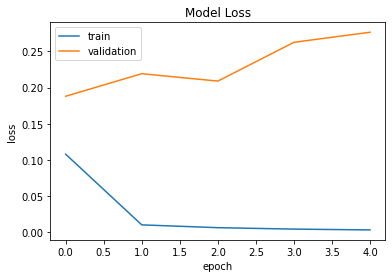

In [17]:
learner.plot('loss')

In [18]:
learner.validate()

470/470 [==============================] - 24s 46ms/step
              precision    recall  f1-score   support

           0       0.62      0.65      0.63       477
           1       0.99      0.97      0.98     10618
           2       0.93      0.98      0.95      3918

    accuracy                           0.96     15013
   macro avg       0.85      0.87      0.86     15013
weighted avg       0.96      0.96      0.96     15013



array([[  310,    37,   130],
       [  187, 10254,   177],
       [    4,    59,  3855]])

In [19]:
y_pred = predictor.predict(X_test)

NameError: ignored